In [1]:
import pandas as pd
import pandas_datareader as pdr


In [2]:
df = pdr.get_data_tiingo('AAPL',api_key='5##################5c%%%d6@@@@d6$$$$7')
df.to_csv('AAPL.csv')

In [3]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
1,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0
2,AAPL,2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56,68457388,23.320970,23.707723,23.128752,23.288548,273829552,0.0,1.0
3,AAPL,2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68,81094428,22.336719,23.188965,22.332087,22.853161,324377712,0.0,1.0
4,AAPL,2016-01-08 00:00:00+00:00,96.96,99.110,96.76,98.55,70798016,22.454829,22.952744,22.408511,22.823055,283192064,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-12-22 00:00:00+00:00,131.88,134.405,129.6500,131.61,169351825,131.88,134.405,129.6500,131.61,169351825,0.0,1.0
1253,AAPL,2020-12-23 00:00:00+00:00,130.96,132.430,130.7800,132.16,88223692,130.96,132.430,130.7800,132.16,88223692,0.0,1.0
1254,AAPL,2020-12-24 00:00:00+00:00,131.97,133.460,131.1000,131.32,54930064,131.97,133.460,131.1000,131.32,54930064,0.0,1.0
1255,AAPL,2020-12-28 00:00:00+00:00,136.69,137.340,133.5100,133.99,123124632,136.69,137.340,133.5100,133.99,123124632,0.0,1.0
1256,AAPL,2020-12-29 00:00:00+00:00,134.87,138.789,134.3409,138.05,121047324,134.87,138.789,134.3409,138.05,121047324,0.0,1.0


In [5]:
df1 = df.reset_index()['close']


In [6]:
df1.shape

(1257,)

In [7]:
df1

0       105.35
1       102.71
2       100.70
3        96.45
4        96.96
         ...  
1252    131.88
1253    130.96
1254    131.97
1255    136.69
1256    134.87
Name: close, Length: 1257, dtype: float64

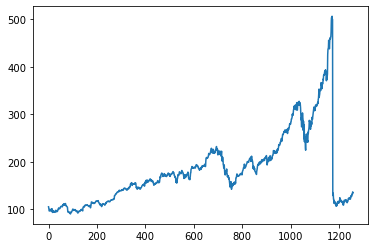

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
#LSTM are sensitive to the scale of the data. so we apply MinMax scaler
#Transforming data to 0 and 1
import numpy as np
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
df1 = Scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape
df1

array([[0.03610343],
       [0.02975346],
       [0.02491882],
       ...,
       [0.10013229],
       [0.11148527],
       [0.10710764]])

In [10]:
#Splitting Data in Train and Test Set
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [11]:
train_size, test_size

(817, 440)

In [12]:
len(train_data), len(test_data)

(817, 440)

In [13]:
import numpy
def create_dataset(dataset, time_stamp):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_stamp-1):
        a = dataset[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(dataset[i+time_stamp,0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_stamp = 100
X_train, Y_train = create_dataset(train_data, time_stamp)
X_test, Y_test = create_dataset(test_data, time_stamp)
print(X_train)

[[0.03610343 0.02975346 0.02491882 ... 0.01464823 0.018184   0.02232111]
 [0.02975346 0.02491882 0.01469633 ... 0.018184   0.02232111 0.02422129]
 [0.02491882 0.01469633 0.01592303 ... 0.02232111 0.02422129 0.02407697]
 ...
 [0.30912808 0.31720986 0.28175586 ... 0.2366807  0.23199038 0.23603127]
 [0.31720986 0.28175586 0.2675887  ... 0.23199038 0.23603127 0.23663259]
 [0.28175586 0.2675887  0.27283223 ... 0.23603127 0.23663259 0.2395911 ]]


In [15]:
print(X_test.shape)
print(Y_test.shape)

(339, 100)
(339,)


In [16]:
#reshape to 3D data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [17]:
#Stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=100, batch_size=100, verbose=1)

Epoch 1/100
8/8 [==============================] - 16s 846ms/step - loss: 0.0247 - val_loss: 0.0262
Epoch 2/100
8/8 [==============================] - 3s 334ms/step - loss: 0.0044 - val_loss: 0.0543
Epoch 3/100
8/8 [==============================] - 3s 327ms/step - loss: 0.0025 - val_loss: 0.0213
Epoch 4/100
8/8 [==============================] - 2s 313ms/step - loss: 0.0011 - val_loss: 0.0218
Epoch 5/100
8/8 [==============================] - 2s 314ms/step - loss: 5.9870e-04 - val_loss: 0.0225
Epoch 6/100
8/8 [==============================] - 2s 311ms/step - loss: 5.2809e-04 - val_loss: 0.0188
Epoch 7/100
8/8 [==============================] - 3s 317ms/step - loss: 3.8429e-04 - val_loss: 0.0184
Epoch 8/100
8/8 [==============================] - 2s 314ms/step - loss: 3.4319e-04 - val_loss: 0.0181
Epoch 9/100
8/8 [==============================] - 3s 313ms/step - loss: 3.2620e-04 - val_loss: 0.0177
Epoch 10/100
8/8 [==============================] - 2s 313ms/step - loss: 3.0481e-04 - v

8/8 [==============================] - 2s 316ms/step - loss: 1.5635e-04 - val_loss: 0.0102
Epoch 81/100
8/8 [==============================] - 2s 312ms/step - loss: 1.7635e-04 - val_loss: 0.0107
Epoch 82/100
8/8 [==============================] - 3s 368ms/step - loss: 1.2845e-04 - val_loss: 0.0107
Epoch 83/100
8/8 [==============================] - 3s 409ms/step - loss: 1.4152e-04 - val_loss: 0.0113
Epoch 84/100
8/8 [==============================] - 3s 391ms/step - loss: 1.3796e-04 - val_loss: 0.0109
Epoch 85/100
8/8 [==============================] - 3s 356ms/step - loss: 1.4571e-04 - val_loss: 0.0112
Epoch 86/100
8/8 [==============================] - 2s 311ms/step - loss: 1.4466e-04 - val_loss: 0.0107
Epoch 87/100
8/8 [==============================] - 2s 309ms/step - loss: 1.5869e-04 - val_loss: 0.0112
Epoch 88/100
8/8 [==============================] - 2s 312ms/step - loss: 1.4259e-04 - val_loss: 0.0111
Epoch 89/100
8/8 [==============================] - 2s 311ms/step - loss: 1.3

In [20]:

#predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
#Transform to original form
train_predict = Scaler.inverse_transform(train_predict)
test_predict = Scaler.inverse_transform(test_predict)

In [21]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

159.7883360835102

In [22]:
math.sqrt(mean_squared_error(Y_test,test_predict))

263.4170281565659

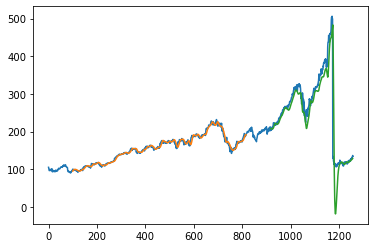

In [23]:
#plotting
look_back=100 #time_stamp
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(Scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#Blue:complete dataset
#Gree:Predicted Output for Test dataset
#yello:Predicted Output for Train dataset

In [24]:
len(test_data)

440

In [25]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555,
 0.04810583283223091,
 0.03968731208659049,
 0.04748045700541187,
 0.05164161154539987,
 0.04036079374624174,
 0.04300661455201443,
 0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0.08192423331328924,
 0.07398677089597111,

In [27]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0981338]
101
1 day input [0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.

9 day output [[0.10701514]]
10 day input [0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0

18 day output [[0.11038067]]
19 day input [0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.10710764 0.0981338  0.10050686 0.10233009
 0.10365147 0.1045913

27 day output [[0.11393237]]
28 day input [0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.0981338  0.10050686 0.10233009 0.10365147 0.10459139 0.1052744
 0.10580084 0.10624057 0.10663719 0.10701514 0.10738662 0.10775694
 0.10812785 0.10849985

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

1257

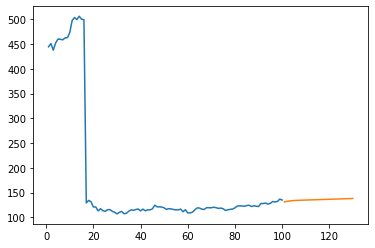

In [29]:
import matplotlib.pyplot as plt
plt.plot(day_new,Scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,Scaler.inverse_transform(lst_output))

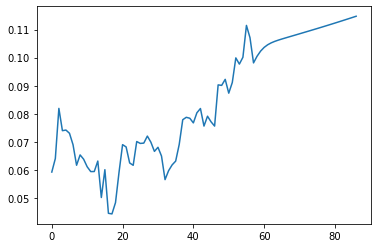

In [30]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

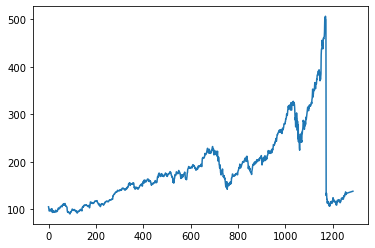

In [31]:
df3=Scaler.inverse_transform(df3).tolist()
plt.plot(df3)